# МАТЕМАТИЧНЕ МОДЕЛЮВАННЯ МАТЕРІАЛІВ ТА ТЕХНОЛОГІЧНИХ ПРОЦЕСІВ В МАТЕРІАЛОЗНАВСТВІ
Комп'ютерний практикум

*Виконав студент групи ФМ-71мп*

*Богомаз Ростислав*

## 5. СИМПЛЕКС- ЗАГРАТОВАНИЙ ПЛАНОВАНИЙ ЕКСПЕРИМЕНТ ДЛЯ ПОБУДОВИ МАТЕМАТИЧНОЇ МОДЕЛІ “СКЛАД - ВЛАСТИВОСТІ” СПЛАВУ СИСТЕМИ $Al\!-\!Mg\!-\!Zn$

**Мета роботи:** опанування методу планування експерименту типу “склад -
властивості” та побудови математичних моделей високих порядків на прикладі
дослідження сплаву системи $Al\!-\!Mg\!-\!Zn$.

### Завдання комп’ютерного практикуму

Побудувати матрицю симплекс-решітчастого плану для заданої викладачем
властивості сплаву системи $Al\!-\!Mg\!-\!Zn$. По даним експерименту “склад - властивості”
побудувати математичну модель четвертого порядку. По результатам моделювання
побудувати графічну інтерпретацію моделі у вигляді ліній рівного рівня.

### Матеріали

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from IPython.display import Latex
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

### Порядок виконання комп’ютерного практикуму

**Заповнити матрицю симплекс-решітчастого плану з факторами (компонентами
сплаву), які виражені у долях, та результатами
вимірювань вказаної викладачем властивості сплаву системи $Al\!-\!Mg\!-\!Zn$. Досліджуваною властивістю є відношення $$y = \frac{\sigma_{0.2}}{\sigma_B}$$**

In [2]:
data = pd.read_csv('lab5_data.csv', names=['Zn', 'Mg', 'Al', 'y'])
data

,Zn,Mg,Al,y
0,0.070,0.010,0.920,0.73
1,0.055,0.025,0.920,0.69
2,0.040,0.040,0.920,0.58
3,0.025,0.055,0.920,0.47
4,0.010,0.070,0.920,0.47
5,0.010,0.055,0.935,0.46
6,0.010,0.040,0.950,0.46
7,0.010,0.025,0.965,0.49
8,0.010,0.010,0.980,0.57
9,0.025,0.010,0.965,0.58


Розмітимо матрицю факторів `X`, та відгук `y`:

In [3]:
X = data[['Mg', 'Zn', 'Al']]
y = data['y']

**Розрахувати коефіцієнти математичної моделі четвертого порядку.**

Для цього побудуємо матрицю факторів взаємодій до 4-го порядку.

In [4]:
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
Xnew = poly.fit_transform(X)
Xnew.shape

(15, 34)

Створюємо модель 4-го порядку (квазілінійна регресія) та знаходимо коефіцієнти мат. моделі:

In [5]:
regressor = Ridge(alpha=1e-8)
regressor.fit(Xnew, y)

%precision 2
regressor.intercept_, regressor.coef_

(11.56, array([ -3.77,  13.12,  -9.35, -16.95,   8.3 ,   4.87,  10.89,  -6.08,
         -8.14,  50.15, -74.02,   6.91,  86.64,  -4.32,   2.29, -83.27,
          7.52,  -9.27,  -1.16,   7.85,  -6.04,  48.34,   0.6 , -68.58,
         27.15,   6.64,  79.41, -15.15,  -9.71, -12.94, -76.97,   5.08,
          0.8 ,   7.75]))

**Перевірити адекватність моделі.**

Оцінимо коефіцієнт кореляції між відгуком моделі та експериментальними значеннями:

In [6]:
R = regressor.score(Xnew, y)
Latex(f'$R^2 = {R:.2f}$')

<IPython.core.display.Latex object>

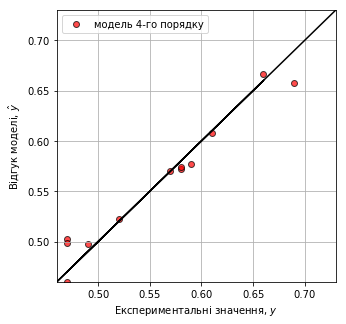

In [7]:
plt.figure(figsize=(5,5))
plt.plot(y, y, color='black', label='')

plt.scatter(y, regressor.predict(Xnew), color="red", alpha=.7, edgecolor='black', label='модель 4-го порядку')

plt.legend()
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.xlabel('Експериментальні значення, $y$')
plt.ylabel('Відгук моделі, $\hat{y}$')

**Побудувати графік ліній рівного рівня**

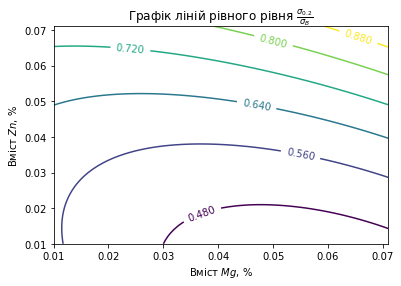

In [8]:
delta = 0.001
x1 = np.arange(data.Mg.min(), data.Mg.max()+0.001, delta)
x2 = np.arange(data.Zn.min(), data.Zn.max()+0.001, delta)
x3 = 1 - x1 - x2
X1, X2 = np.meshgrid(x1, x2)

Y = regressor.predict(poly.fit_transform(np.c_[X1.ravel(), X2.ravel(), (1 - X1 - X2).ravel()]))
Y = Y.reshape(X1.shape)

plt.figure()
CS = plt.contour(X1, X2, Y)
plt.clabel(CS, inline=1, fontsize=10)
plt.title(r'Графік ліній рівного рівня $\frac{\sigma_{0.2}}{\sigma_B}$')
plt.xlabel('Вміст $Mg$, %')
plt.ylabel('Вміст $Zn$, %')

### Висновок

Опанували методу планування експерименту типу “склад -
властивості” та побудови математичних моделей високих порядків на прикладі
дослідження сплаву системи $Al\!-\!Mg\!-\!Zn$.

Була побудована модель 4-го порядку відгуки якої корелюють з експериментальними даними з коефіцієнтом 0.96.